## MỤC LỤC
[Tổng Quan Lí Thuyết](#0)      
1. [Mục tiêu](#1)
1. [Import Dữ Liệu Và Feature Engineering](#2)
1. [Hồi Quy Ridge](#3)
1. [Hồi QUy Lasso](#4)     
1. [Hồi Quy Elastic](#5)     


# Lý thuyết  <a id="0"></a>
## Tổng Quan Hồi Quy Lasso và Ridge
### Hồi Quy Lasso


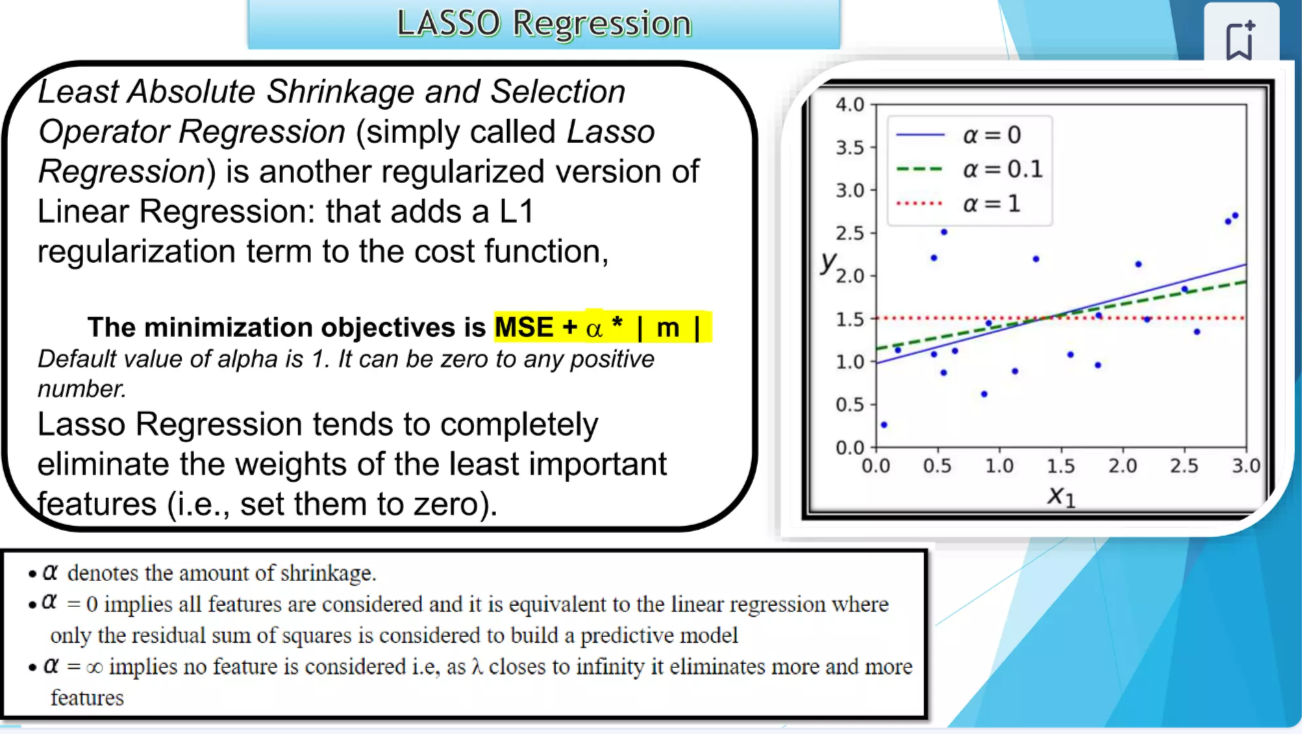

Thành phần điều chuẩn norm bậc 1 cũng có tác dụng như một sự kiểm soát áp đặt lên hệ số ước lượng. Khi muốn gia tăng sự kiểm soát, chúng ta sẽ gia tăng hệ số
 để mô hình trở nên bớt phức tạp hơn. Cũng tương tự như hồi qui Ridge chúng ta cùng phân tích tác động của
:

Trường hợp alpha=0
, thành phần điều chuẩn bị tiêu giảm và chúng ta quay trở về bài toán hồi qui tuyến tính.

Trường hợp alpha
 nhỏ thì vai trò của thành phần điều chuẩn trở nên ít quan trọng. Mức độ kiểm soát quá khớp của mô hình sẽ trở nên kém hơn.

Trường hợp alpha
 lớn chúng ta muốn gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng.

## Hồi Quy RidGe

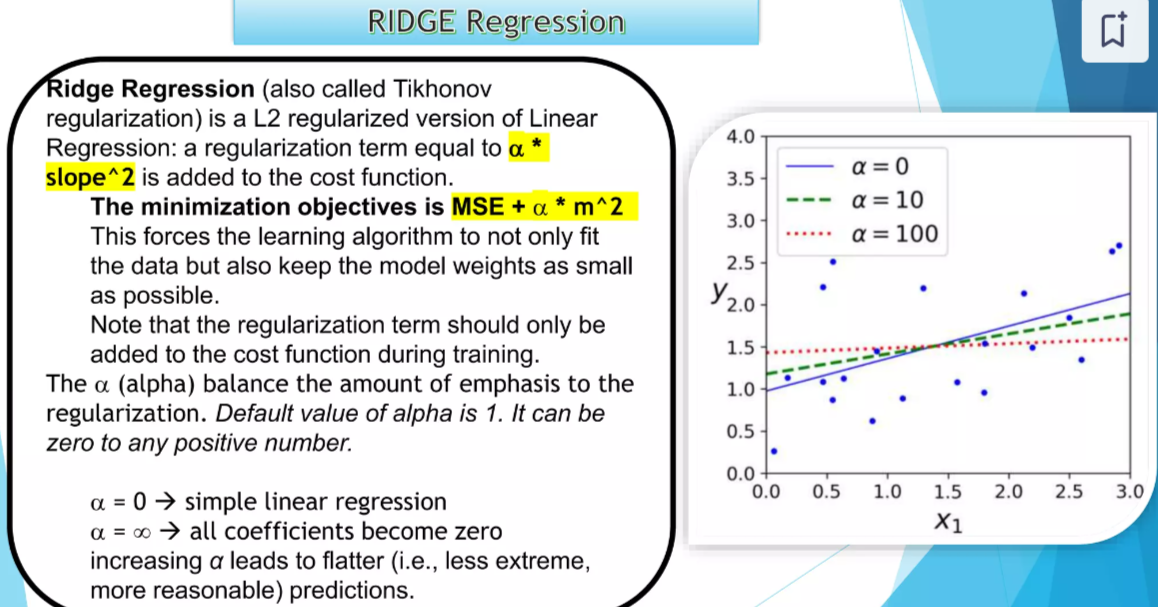

Bài toán tối ưu hàm mất mát của hồi qui Ridge về bản chất là tối ưu song song hai thành phần bao gồm tổng bình phương phần dư và thành phần điều chuẩn. Hệ số
 có tác dụng điều chỉnh độ lớn của thành phần điều chuẩn tác động lên hàm mất mát.

Trường hợp alpha =0
, thành phần điều chuẩn bị tiêu giảm và chúng ta quay trở về bài toán hồi qui tuyến tính.

Trường hợp alpha
 nhỏ thì vai trò của thành phần điều chuẩn trở nên ít quan trọng. Mức độ kiểm soát quá khớp của mô hình sẽ trở nên kém hơn.

Trường hợp alpha
 lớn chúng ta muốn gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng và qua đó giảm bớt hiện tượng qúa khớp.

Khi tăng dần hệ số
 thì hồi qui Ridge sẽ có xu hướng thu hẹp hệ số ước lượng từ mô hình. Chúng ta sẽ thấy rõ thông qua ví dụ mẫu bên dưới.

## HỒi quy Elastic
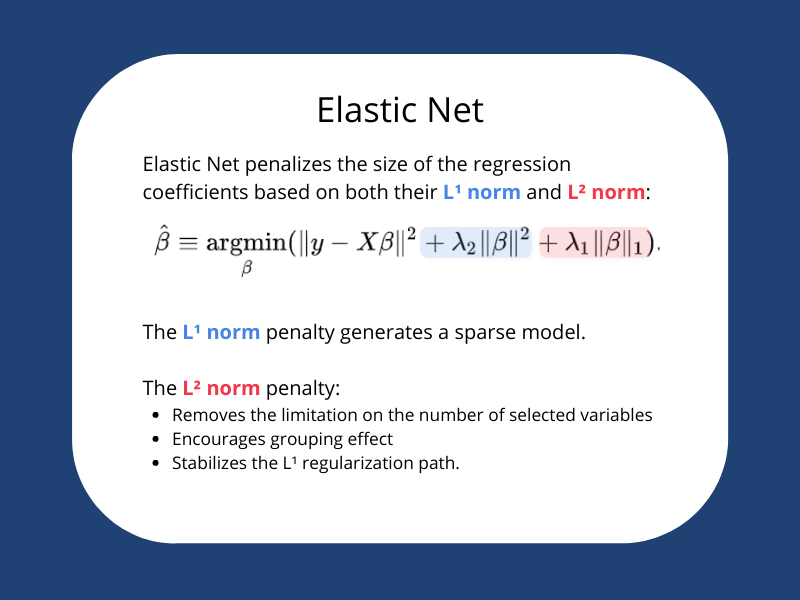

L1 norm (Lasso) tạo ra các mô hình tối giản bằng cách loại bỏ các biến không quan trọng.
L2 norm (Ridge) giúp ổn định các hệ số hồi quy và khuyến khích các biến tương quan được nhóm lại.
Kết hợp cả hai cách này, Elastic Net tạo ra các mô hình với số lượng biến ít, đồng thời vẫn giữ được độ chính xác.

##Tunning hệ Số alpha
Khi tiến hành tunning hệ số alpha ta sẽ chủ yếu tunning các hệ số dựa vào mean square error

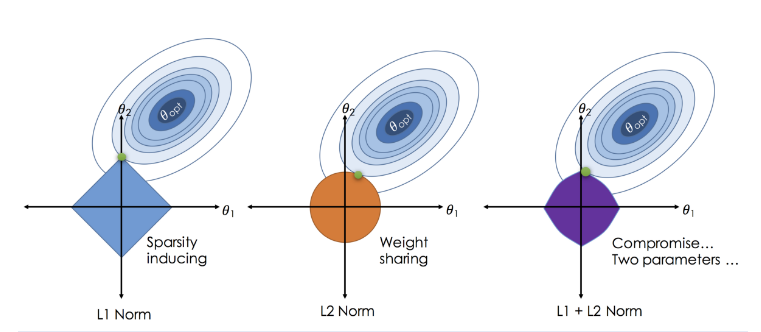

Tài liệu Kham Khảo :
*  https://www.slideshare.net/slideshow/lasso-and-ridge-regression/249502536
* https://phamdinhkhanh.github.io/deepai-book/ch_ml/RidgedRegression.html#bai-toan-hoi-qui-lasso


# Tổng quan là như vậy giờ ta áp dụng vào mô hình hồi Quy Tuyến Tính vào bài toán dự đoán giá nhà.

# MỤC TIÊU.  <a id="1"></a>
1. Thử Nghiêm Đưa Ra Các Hệ Số PHÙ HỢP.
2. Xữ Lí các hệ số phù hợp cho model.
3. So Sánh Model với Baseline.

#1. Import Dữ liệu đầu vào và Feature engineering  <a id="2"></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/DataFolder/5_preprocessed_data.csv')

df_location = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/DataFolder/7_coordinates_by_street_name_1_5000.csv')
df_location2 = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/DataFolder/8_coordinates_by_street_nam_5000_end.csv')
merged_df1 = pd.merge(df, df_location[['article_id', 'longitude', 'latitude']], on='article_id', how='inner')
merged_df2 = pd.merge(df, df_location2[['article_id', 'longitude', 'latitude']], on='article_id', how='inner')
merged_df = pd.concat([merged_df1, merged_df2], ignore_index=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   article_id          5389 non-null   int64  
 1   category            5389 non-null   object 
 2   phone               5388 non-null   float64
 3   district            5389 non-null   object 
 4   date_posted         5389 non-null   object 
 5   area                5389 non-null   float64
 6   bedroom             4827 non-null   float64
 7   wc                  4426 non-null   float64
 8   direction           564 non-null    object 
 9   balcony_direction   233 non-null    object 
 10  total_room_LLm      2778 non-null   float64
 11  count_conveniences  5389 non-null   int64  
 12  alleyway_property   4695 non-null   float64
 13  under_mortgage      962 non-null    float64
 14  furnished           1388 non-null   float64
 15  has_lowerlevel      1376 non-null   float64
 16  has_ro

Dựa vào dữ liệu trên ta có thể thấy có 5 dữ liệu dạng object và  2 dạng kiểu int 64 và còn lại là dạng float, các biến không liên quan nhiều đến dữ liệu hiện tại build linear regression là biến phone, category, streetname, và biến date post.

## 2. Imputation (xữ lí mising value và loại bỏ cột không cần thiết.)
Giờ Ta sẽ kiểm tra missing value và kiểm tra dữ liệu nhiều quá 50% thì sẽ drop dữ liệu đó, các dữ liệu thiếu và drop các biến không cần thiết và loại bỏ các biến định tính).

In [ ]:
merged_df.head()

,article_id,category,phone,district,date_posted,area,bedroom,wc,direction,balcony_direction,...,under_mortgage,furnished,has_lowerlevel,has_rooftop,numbers_of_floors,street_name,price,price_per_m2,longitude,latitude
0,285164,Nhà riêng,933670051.0,Nhà Bè,2023-12-10,150.0,2.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,3.899,0.025993,NaN,NaN
1,285163,Nhà riêng,922351398.0,Tân Bình,2023-12-10,51.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,Âu Cơ,5.500,0.107843,106.648074,10.774784
2,285162,Nhà,907340956.0,Phú Nhuận,2023-12-10,45.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,Phan Đăng Lưu,4.600,0.102222,106.680425,10.799369
3,285161,Nhà riêng,849734646.0,Quận 5,2023-12-10,41.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,LÊ HỒNG PHONG,7.350,0.179268,106.676687,10.761255
4,285129,Nhà,907340956.0,Bình Thạnh,2023-12-08,33.0,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,Bạch Đằng,4.000,0.121212,106.709006,10.803060


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Xác định các column có hơn 50% dữ liệu bị thiếu.
thresh = 0.5 * merged_df.shape[0]
drop_cols = merged_df.columns[merged_df.isnull().sum() > thresh]

# Loại bỏ các cột mà có dữ liệu lớn hơn 50%
merged_df = merged_df.drop(drop_cols, axis=1)

# Lựa chọn các cột số và không quan tâm đến các biến didnhj tính.
numeric_cols = merged_df.select_dtypes(include=np.number).columns
merged_df_numeric = merged_df[numeric_cols]

# sử dụng phương th
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
merged_df_numeric = pd.DataFrame(imputer.fit_transform(merged_df_numeric), columns=merged_df_numeric.columns)

# Check for missing values in the numeric DataFrame
missing_values = merged_df_numeric.isnull().sum().sum()
print(f"Number of missing values after imputation: {missing_values}")

# Optionally, join the imputed numeric data back with the non-numeric columns if needed
# merged_df = merged_df.drop(numeric_cols, axis=1).join(merged_df_numeric)
merged_df_numeric = merged_df_numeric.drop(['article_id','phone','price_per_m2'], axis=1)

Number of missing values after imputation: 0


In [ ]:
merged_df_numeric.head()

,area,bedroom,wc,total_room_LLm,count_conveniences,alleyway_property,numbers_of_floors,price,longitude,latitude
0,150.0,2.000000,1.00000,4.097912,0.0,1.000000,2.391287,3.899,106.669549,10.800235
1,51.0,3.085353,2.92047,4.097912,2.0,1.000000,3.000000,5.500,106.648074,10.774784
2,45.0,2.000000,2.00000,2.000000,2.0,1.000000,2.000000,4.600,106.680425,10.799369
3,41.0,3.085353,2.92047,4.097912,0.0,0.997444,2.000000,7.350,106.676687,10.761255
4,33.0,3.000000,3.00000,4.097912,4.0,0.997444,3.000000,4.000,106.709006,10.803060


## 3.Handling outlier đã xữ lí trước đó.

In [ ]:
merged_df_numeric['price'].describe()

count    5389.000000
mean        5.083078
std         2.058358
min         0.105000
25%         3.700000
50%         4.900000
75%         6.500000
max        10.000000
Name: price, dtype: float64

## Chia tập dữ liệu ra

In [ ]:


X = merged_df_numeric.drop(['price'], axis=1)
y = merged_df_numeric['price']


In [ ]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled)


,0,1,2,3,4,5,6,7,8
0,1.000000,0.166667,0.000000,0.387239,0.000000,1.000000,0.341612,0.506960,0.457953
1,0.297872,0.347559,0.320078,0.387239,0.285714,1.000000,0.428571,0.451468,0.381221
2,0.255319,0.166667,0.166667,0.125000,0.285714,1.000000,0.285714,0.535064,0.455344
3,0.226950,0.347559,0.320078,0.387239,0.000000,0.997444,0.285714,0.525404,0.340431
4,0.170213,0.333333,0.333333,0.387239,0.571429,0.997444,0.428571,0.608918,0.466472
...,...,...,...,...,...,...,...,...,...
5384,0.212766,0.500000,0.333333,0.375000,0.142857,1.000000,0.285714,0.359013,0.326020
5385,0.219858,0.166667,0.320078,0.387239,0.285714,0.997444,0.341612,0.506960,0.457953
5386,0.524823,0.666667,0.666667,0.387239,0.285714,1.000000,0.428571,0.506960,0.457953
5387,0.539007,0.333333,0.166667,0.250000,0.857143,1.000000,0.285714,0.644924,0.322316


In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

features = list(merged_df_numeric.drop(['price'], axis=1).columns)

idx = np.arange(X_scaled.shape[0])

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_scaled, y, idx, test_size=0.33, random_state=42)

# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

# 2. Hồi Quy Ridge <a id="3"></a>

Vì mỗi Hàm đề có một số vấn đề nên ta cần phải Tunning hệ số cho các biến.

## 2.1 Vẽ đồ thị hệ số Alpha

Ta sẽ sử dụng thư viện và tunning hệ số alpha và vẽ đồ thị để xem miền hợp lí cho hệ số alpha này

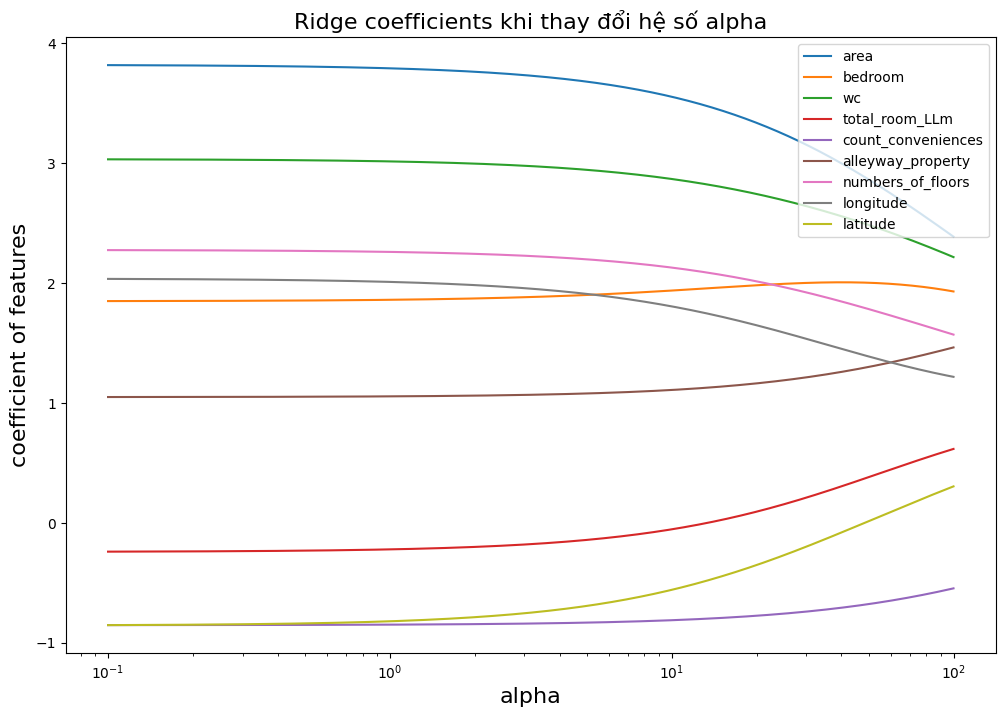

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
# Thay đổi alphas từ 1 --> 3000
n_alphas = 3000
alphas = 1/np.logspace(1, -2, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

Sự thay đổi của độ lớn các hệ số ước lượng (coefficient of features) theo hệ số điều chuẩn
. Khi tăng dần độ lớn của
 thì độ lớn của hệ số ước lượng giảm dần .

## 2.2 Sử dụng Thư Viện Để Tiến Hành Đưa ra Hệ số Alpha Tốt Nhất.

Khi Tunning Alpha Thì trong bài làm này ta sẽ sử dụng thước đo là MeanSquareError của hồi quy Ridge để tunning dữ liệu và sử dụng GridSearchCV và để tiến hành chia tính trung bình và cài đặt số lần lặp để đưa ra hệ số alpha

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Ridge
from numpy import logspace


# X_scaled: dữ liệu đầu vào đã được chuẩn hóa
# y: nhãn đầu ra
#chuẩn bị model vào piple để huấn luyện

pipeline = Pipeline([
                     ('model', Ridge())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha': logspace(0.5, 1, 99 )}, # Tham số alpha từ 10^-5 đến 10^2
                      cv=10, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

# Giả sử X_scaled và y đã được chuẩn bị từ trước
search.fit(X_scaled, y)
print(search.best_estimator_)
print('Best score: ', search.best_score_)
print('Best alpha:', search.best_params_['model__alpha'])


Fitting 10 folds for each of 99 candidates, totalling 990 fits
[CV 1/10] END .model__alpha=3.1622776601683795;, score=-2.753 total time=   0.0s
[CV 2/10] END .model__alpha=3.1622776601683795;, score=-2.139 total time=   0.0s
[CV 3/10] END .model__alpha=3.1622776601683795;, score=-1.955 total time=   0.0s
[CV 4/10] END .model__alpha=3.1622776601683795;, score=-2.460 total time=   0.0s
[CV 5/10] END .model__alpha=3.1622776601683795;, score=-2.175 total time=   0.0s
[CV 6/10] END .model__alpha=3.1622776601683795;, score=-2.458 total time=   0.0s
[CV 7/10] END .model__alpha=3.1622776601683795;, score=-2.817 total time=   0.0s
[CV 8/10] END .model__alpha=3.1622776601683795;, score=-2.716 total time=   0.0s
[CV 9/10] END .model__alpha=3.1622776601683795;, score=-3.536 total time=   0.0s
[CV 10/10] END model__alpha=3.1622776601683795;, score=-3.305 total time=   0.0s
[CV 1/10] END .model__alpha=3.1996468029136977;, score=-2.753 total time=   0.0s
[CV 2/10] END .model__alpha=3.1996468029136977

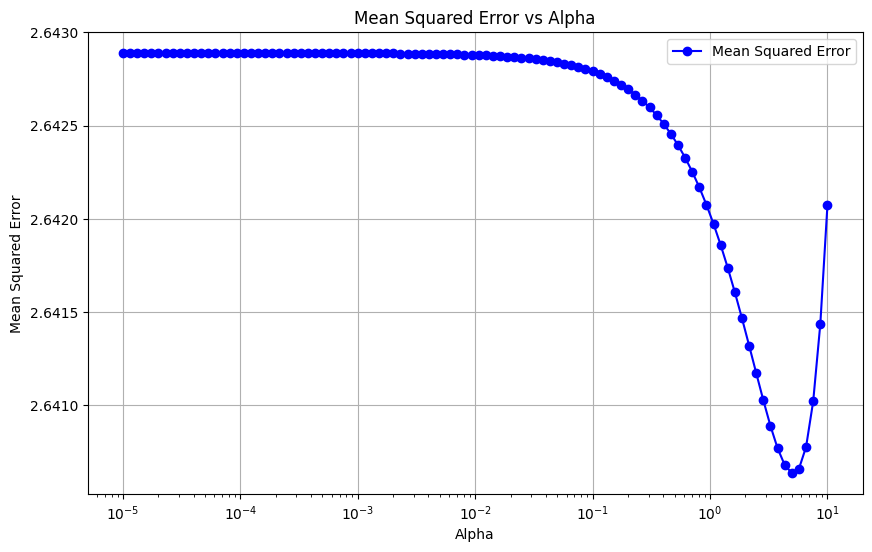

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# List để lưu trữ các giá trị MSE
mean_mse_values = []

alpha_values = np.logspace(-5, 1, 100) # chia alpha thành 100 bước từ 10^-5 đến 10^-1

# Vòng lặp qua từng giá trị alpha
for alpha in alpha_values:
    reg_ridge = Ridge(alpha=alpha)
    mse = cross_val_score(reg_ridge, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    mean_mse = np.mean(np.abs(mse))
    mean_mse_values.append(mean_mse)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_mse_values, marker='o', linestyle='-', color='b', label='Mean Squared Error')
plt.xscale('log')  # Đặt scale log cho trục x để nhìn rõ hơn với các giá trị alpha lớn
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Alpha')
plt.legend()
plt.grid(True)
plt.show()



Ta có hệ số alpha cuối đạt được là 5.000110381399524 cho ra trung bình MSE thấp nhất là 2.6312512493095097 Và Ta sẽ sử dụng nó để tiến hành thực thi hàm meansquare Error

Nhận xét về R-squred và Mean squared score đã khiến mô hình có dữ liệu thấp hơn baseline model chứng tỏ là việc thay đổi này không hiệu quả nhiều đối với baseline model

## 2.3 Thử thực thi với class implement Ridge

1. Hàm fit
  \begin{aligned}
&\text{Thêm cột các giá trị 1 vào X:} \\
&\mathbf{X} = \left[\begin{array}{cc}
1 & \mathbf{x}_1 \\
1 & \mathbf{x}_2 \\
\vdots & \vdots \\
1 & \mathbf{x}_n
\end{array}\right] \\
&\text{Tính ma trận đơn vị } \mathbf{I}: \\
&\mathbf{I} = \begin{bmatrix}
0 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix} \\
&\text{Tính hệ số Ridge Regression:} \\
&\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I}\right)^{-1} \mathbf{X}^\top \mathbf{y} \\
&\text{Lưu kết quả vào self.coef\_.}
\end{aligned}
2. hàm predict.
  \begin{aligned}
&\text{Thêm cột các giá trị 1 vào X:} \\
&\mathbf{X} = \left[\begin{array}{cc}
1 & \mathbf{x}_1 \\
1 & \mathbf{x}_2 \\
\vdots & \vdots \\
1 & \mathbf{x}_m
\end{array}\right] \\
&\text{Tính giá trị dự đoán:} \\
&\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}
\end{aligned}


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class Ridge_imp(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=1.0):

        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):

        # Thêm cột các giá trị 1 vào X để tính intercept
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        # Tính toán hệ số Ridge Regression
        I = np.eye(X.shape[1])
        I[0, 0] = 0  # Không regularize hệ số intercept

        self.coef_ = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y

    def predict(self, X):

        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.coef_

    def get_params(self, deep=True):

        return {"alpha": self.alpha}

    def set_params(self, **params):

        for key, value in params.items():
            setattr(self, key, value)
        return self


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Sử dụng code này cho tôi
reg_ridge = Ridge_imp(alpha=5.000110381399524)
mse = cross_val_score(reg_ridge, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
scores = cross_val_score(reg_ridge, X_scaled, y, scoring='r2', cv=5)

mean_r2 = np.mean(scores)
print(f"R-squared score: {mean_r2:.5f}")

mean_mse = np.mean(mse)
print(f"Mean squared error: {abs(mean_mse)}")


R-squared score: 0.36480
Mean squared error: 2.6428126466495705


## 2.4 Áp dụng hệ số Alpha  thư viện mới tìm được và so sánh với baseline model


In [ ]:
# đưa vào các hệ số alpha bằng  sau khi đã chạy mô hình ở trên
from sklearn.metrics import mean_squared_error, r2_score
reg_ridge = Ridge(alpha = 5.000110381399524)
reg_ridge.fit(X_scaled, y)

coef_dict_baseline = {}
for coef, feat in zip(reg_ridge.coef_, X.columns):  #
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'area': 0.6022829979451447,
 'bedroom': 0.3217278782983187,
 'wc': 0.553081484541014,
 'total_room_LLm': -0.030629314208420372,
 'count_conveniences': -0.20685056320545073,
 'alleyway_property': 0.04160039334351675,
 'numbers_of_floors': 0.31699858627813415,
 'longitude': 0.22294234467000645,
 'latitude': -0.08761783520258071}

In [ ]:
# ta sẽ sử dụng Meansquare Erro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
reg_ridge = Ridge(alpha = 5.000110381399524)
mse=cross_val_score(reg_ridge,X_scaled,y,scoring='neg_mean_squared_error',cv=5)
scores = cross_val_score(reg_ridge, X_scaled, y, scoring='r2', cv=5)
mean_r2 = np.mean(scores)
print(f"R-squared score: {mean_r2:.5f}")
mean_mse=np.mean(mse)
print(f"Mean squared score:{abs(mean_mse)}")
print()

R-squared score: 0.36480
Mean squared score:2.6428126466495705



Nhận Xét so với baseline model thì mô hình hồi Quy ridge có sự chuyển biến mạnh có rất ít hệ số để có thể phạt và loại bỏ hoàn toàn và không có nhiều sự ý nghĩa trong tập dữ liệu này


# 3. Hồi Quy Lasso <a id="4"></a>

In [ ]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the scaled features
pd.DataFrame(X_scaled)


,0,1,2,3,4,5,6,7,8
0,4.191388,-1.041103e+00,-1.753520e+00,0.000000,-0.938159,0.054233,0.000000,0.000000,0.000000
1,-0.254516,-4.259836e-16,4.054838e-16,0.000000,0.244747,0.054233,0.623202,-0.503218,-0.759599
2,-0.523965,-1.041103e+00,-8.404519e-01,-2.126036,0.244747,0.054233,-0.400600,0.254847,-0.025833
3,-0.703598,-4.259836e-16,4.054838e-16,0.000000,-0.938159,0.000000,-0.400600,0.167257,-1.163395
4,-1.062863,-8.187334e-02,7.261636e-02,0.000000,1.427653,0.000000,0.623202,0.924576,0.084326
...,...,...,...,...,...,...,...,...,...
5384,-0.793414,8.773564e-01,7.261636e-02,-0.099225,-0.346706,0.054233,-0.400600,-1.341613,-1.306057
5385,-0.748506,-1.041103e+00,4.054838e-16,0.000000,0.244747,0.000000,0.000000,0.000000,0.000000
5386,1.182544,1.836586e+00,1.898753e+00,0.000000,0.244747,0.054233,0.623202,0.000000,0.000000
5387,1.272360,-8.187334e-02,-8.404519e-01,-1.112630,2.610559,0.054233,-0.400600,1.251081,-1.342717


# 3.1 Visualize giữa coef và hệ số hồi quy

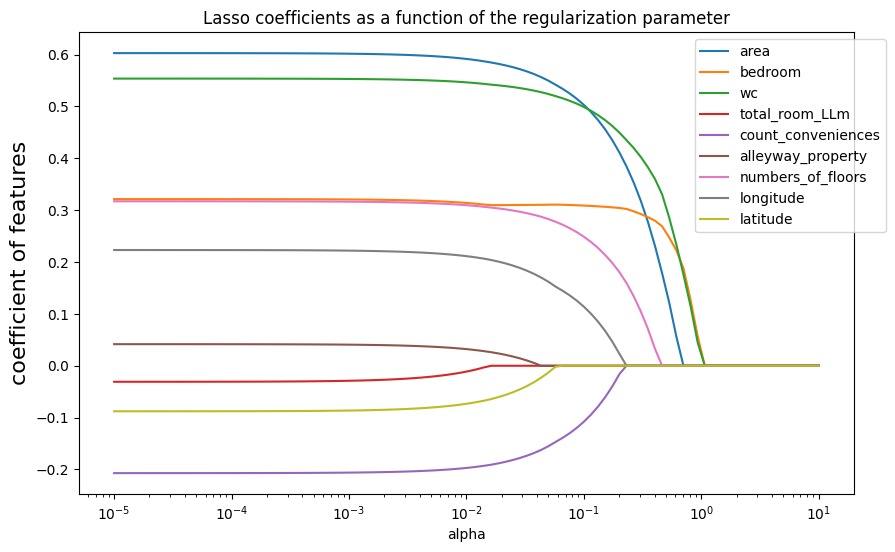

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, PredefinedSplit


# Fit the Lasso model with different alpha values
alphas = np.logspace(-5, 1, 100)
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

# Plot the coefficients as a function of alpha
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.title('Lasso coefficients as a function of the regularization parameter')
plt.axis('tight')
plt.show()




Dựa vào hình trên ta có Khoảng hệ số alpha là từ 0 đến 1

## 3.2 Sử dụng Thư Viện Để Tiến Hành Đưa ra Hệ số Alpha Tốt Nhất.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Lasso
from numpy import logspace

# Giả sử X_scaled và y đã được định nghĩa trước đó
# X_scaled: dữ liệu đầu vào đã được chuẩn hóa
# y: nhãn đầu ra

# Khởi tạo pipeline gồm 2 bước, 'scaler' để chuẩn hoá đầu vào và 'model' là bước huấn luyện
pipeline = Pipeline([
                     ('model', Lasso())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha': logspace(-6, -1, 99 )}, # Tham số alpha từ 10^-5 đến 10^2
                      cv=5, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=5
                      )

# Giả sử X_scaled và y đã được chuẩn bị từ trước
search.fit(X_scaled, y)
print(search.best_estimator_)
print('Best score: ', search.best_score_)
print('Best alpha:', search.best_params_['model__alpha'])


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............model__alpha=1e-06;, score=-2.498 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-06;, score=-2.239 total time=   0.0s
[CV 3/5] END ...............model__alpha=1e-06;, score=-2.314 total time=   0.0s
[CV 4/5] END ...............model__alpha=1e-06;, score=-2.745 total time=   0.0s
[CV 5/5] END ...............model__alpha=1e-06;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1.1246578221198197e-06;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1.1246578221198197e-06;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1.1246578221198197e-06;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=1.1246578221198197e-06;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1.1246578221198197e-06;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1.2648552168552959e-06;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1.2648552

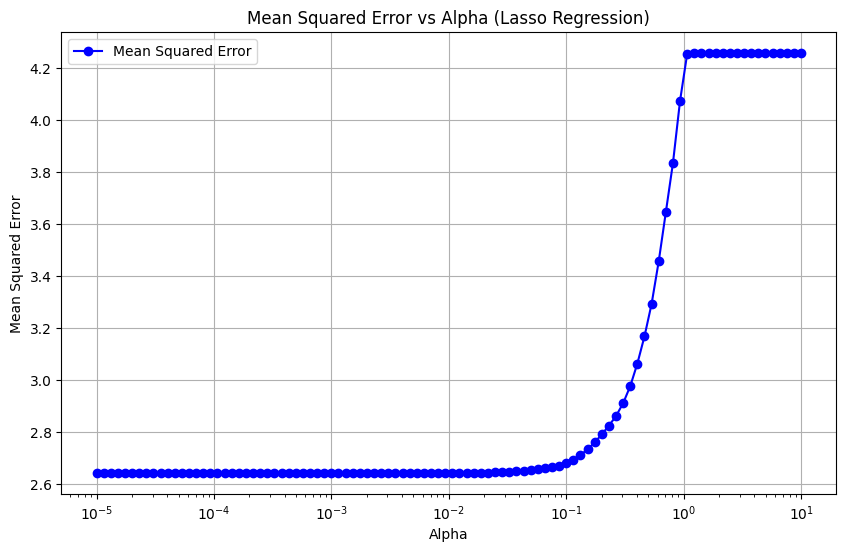

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# List để lưu trữ các giá trị MSE
mean_mse_values = []

# Vòng lặp qua từng giá trị alpha
for alpha in alpha_values:
    reg_lasso = Lasso(alpha=alpha)
    mse = cross_val_score(reg_lasso, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    mean_mse = np.mean(np.abs(mse))
    mean_mse_values.append(mean_mse)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_mse_values, marker='o', linestyle='-', color='b', label='Mean Squared Error')
plt.xscale('log')  # Đặt scale log cho trục x để nhìn rõ hơn với các giá trị alpha nhỏ
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Alpha (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()




Vậy ta tìm được hệ số alpha cho meansquare Error là 0.0012949258422052632

## 3.3 Áp dụng với Hàm Lasso Implement

1. Hàm fit \begin{aligned}
&\text{Thêm cột các giá trị 1 vào X để tính intercept:} \\
&\mathbf{X} = \left[\begin{array}{cc}
1 & \mathbf{x}_1 \\
1 & \mathbf{x}_2 \\
\vdots & \vdots \\
1 & \mathbf{x}_n
\end{array}\right] \\
&\text{Tính ma trận đơn vị } \mathbf{I}: \\
&\mathbf{I} = \begin{bmatrix}
0 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix} \\
&\text{Tính hệ số Lasso Regression:} \\
&\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I}\right)^{-1} \mathbf{X}^\top \mathbf{y} \\
&\text{Lưu kết quả vào self.coef\_.}
\end{aligned}
2. Hàm Predict
\begin{aligned}
&\text{Thêm cột các giá trị 1 vào X để tính intercept:} \\
&\mathbf{X} = \left[\begin{array}{cc}
1 & \mathbf{x}_1 \\
1 & \mathbf{x}_2 \\
\vdots & \vdots \\
1 & \mathbf{x}_n
\end{array}\right] \\
&\text{Tính ma trận đơn vị } \mathbf{I}: \\
&\mathbf{I} = \begin{bmatrix}
0 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix} \\
&\text{Tính hệ số Lasso Regression:} \\
&\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I}\right)^{-1} \mathbf{X}^\top \mathbf{y} \\
&\text{Lưu kết quả vào self.coef\_.}
\end{aligned}

In [ ]:


class Lasso_imp(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=1.0):

        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):

        # Thêm cột các giá trị 1 vào X để tính intercept
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        # Tính toán hệ số Lasso Regression
        I = np.eye(X.shape[1])
        I[0, 0] = 0  # Không regularize hệ số intercept

        self.coef_ = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y

    def predict(self, X):

        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.coef_

    def get_params(self, deep=True):

        return {"alpha": self.alpha}

    def set_params(self, **params):

        for key, value in params.items():
            setattr(self, key, value)
        return self
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Sử dụng code này cho tôi
reg_lasso = Lasso_imp(alpha=0.00129492584220526322)
mse = cross_val_score(reg_lasso, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
scores = cross_val_score(reg_lasso, X_scaled, y, scoring='r2', cv=5)

mean_r2 = np.mean(scores)
print(f"R-squared score: {mean_r2:.5f}")

mean_mse = np.mean(mse)
print(f"Mean squared error: {abs(mean_mse)}")



R-squared score: 0.36478
Mean squared error: 2.6428891489670034


## 3.4 Áp dụng hệ số Alpha  thư viện mới tìm được và so sánh với baseline model


In [ ]:
# ta sẽ sử dụng Meansquare Erro
from sklearn.model_selection import cross_val_score
reg_ridge = Lasso(alpha = 0.0012949258422052632)
mse=cross_val_score(reg_ridge,X_scaled,y,scoring='neg_mean_squared_error',cv=5)
scores = cross_val_score(reg_ridge, X_scaled, y, scoring='r2', cv=5)
mean_r2 = np.mean(scores)
print(f"R-squared score: {mean_r2:.5f}")
mean_mse=np.mean(mse)
print(f"Mean squared score:{abs(mean_mse)}")
print()

R-squared score: 0.36479
Mean squared score:2.6428737432805716



Sau khi sử dụng lasso hiệu suất của mô hình dự đoán giá nhà giảm đi có nghĩa là hệ số điều chỉnh k phù hợp với tập dữ liệu

In [ ]:
# đưa vào các hệ số alpha bằng  sau khi đã chạy mô hình ở trên
from sklearn.metrics import mean_squared_error, r2_score
reg_Lasso = Lasso(alpha = 0.00017575106248547912)
reg_Lasso.fit(X_scaled, y)

coef_dict_baseline = {}
for coef, feat in zip(reg_Lasso.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'area': 0.6026787603124906,
 'bedroom': 0.3212987642083415,
 'wc': 0.5536329255338005,
 'total_room_LLm': -0.03057082246750176,
 'count_conveniences': -0.20687111088646665,
 'alleyway_property': 0.04146181814337831,
 'numbers_of_floors': 0.3170325531367849,
 'longitude': 0.22296590510691958,
 'latitude': -0.08756584662276157}

Nhìn Chung Khi chọn Hệ số Alpha Tối ưu thì nó không có giá trị Alpha nào bị phạt hệ số trở về 0, vậy không có feature nào bị loại bỏ biến, và các hệ số coef chủ yếu thay đổi ở các biến.

## 4 Hồi Quy ElasticNet <a id="5"></a>

## 4.1 Visualize hệ số coef với alpha

In [ ]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the scaled features
pd.DataFrame(X_scaled)


,0,1,2,3,4,5,6,7,8
0,4.191388,-1.041103e+00,-1.753520e+00,0.000000,-0.938159,0.054233,0.000000,0.000000,0.000000
1,-0.254516,-4.259836e-16,4.054838e-16,0.000000,0.244747,0.054233,0.623202,-0.503218,-0.759599
2,-0.523965,-1.041103e+00,-8.404519e-01,-2.126036,0.244747,0.054233,-0.400600,0.254847,-0.025833
3,-0.703598,-4.259836e-16,4.054838e-16,0.000000,-0.938159,0.000000,-0.400600,0.167257,-1.163395
4,-1.062863,-8.187334e-02,7.261636e-02,0.000000,1.427653,0.000000,0.623202,0.924576,0.084326
...,...,...,...,...,...,...,...,...,...
5384,-0.793414,8.773564e-01,7.261636e-02,-0.099225,-0.346706,0.054233,-0.400600,-1.341613,-1.306057
5385,-0.748506,-1.041103e+00,4.054838e-16,0.000000,0.244747,0.000000,0.000000,0.000000,0.000000
5386,1.182544,1.836586e+00,1.898753e+00,0.000000,0.244747,0.054233,0.623202,0.000000,0.000000
5387,1.272360,-8.187334e-02,-8.404519e-01,-1.112630,2.610559,0.054233,-0.400600,1.251081,-1.342717


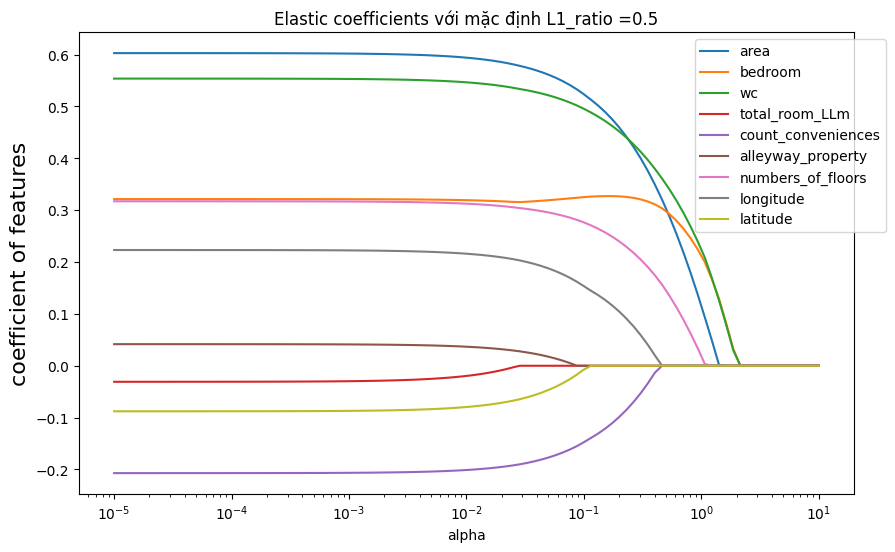

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, PredefinedSplit


# Fit the Lasso model with different alpha values
alphas = np.logspace(-5, 1, 100)
coefs = []
for alpha in alphas:

    model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    model.fit(X_scaled, y)
    coefs.append(model.coef_)

# Plot the coefficients as a function of alpha
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.title('Elastic coefficients với mặc định L1_ratio =0.5')
plt.axis('tight')
plt.show()

## 4.2 Visualize hệ số L1_ratio

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.865e+03, tolerance: 2.283e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


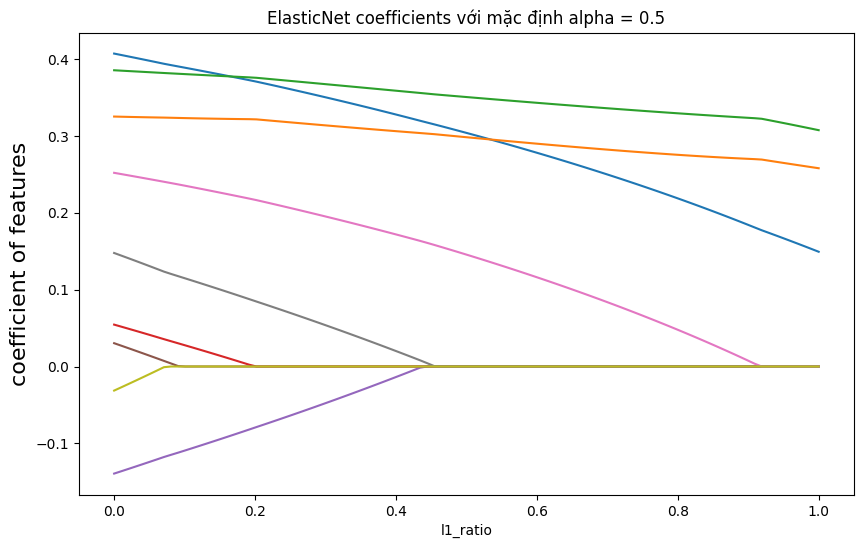

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, PredefinedSplit

# Tạo một mảng các giá trị l1_ratio từ 0 đến 1
l1_ratios = np.linspace(0, 1, 100)
alpha = 0.5
coefs = []



# Fit the ElasticNet model với alpha cố định và thay đổi l1_ratio
for l1_ratio in l1_ratios:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_scaled, y)
    coefs.append(model.coef_)

# Plot the coefficients as a function of l1_ratio
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(l1_ratios, coefs)
ax.set_xlim([0, 1])
plt.xlabel('l1_ratio')
plt.ylabel('weights')
plt.ylabel('coefficient of features', fontsize=16)
plt.title('ElasticNet coefficients với mặc định alpha = 0.5')
plt.axis('tight')
plt.show()


## 4.3 Tunning hệ Số Alpha Và hệ Số l1_ratio

In [ ]:
pipeline = Pipeline([

                     ('model', ElasticNet())
])
search = GridSearchCV(pipeline,
                      {
                          'model__alpha': np.logspace(-8, -1, 30), # Tham số alpha
                          'model__l1_ratio': np.logspace(-8, -1 , 30) # Tham số l1_ratio
                      },
                      cv = 5,
                      scoring="neg_mean_squared_error",
                      verbose=3
                      )

search.fit(X_scaled, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5] END model__alpha=1e-08, model__l1_ratio=1e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=1e-08;, score=-2.239 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+03, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e+03, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1e-08, model__l1_ratio=1e-08;, score=-2.314 total time=   0.1s
[CV 4/5] END model__alpha=1e-08, model__l1_ratio=1e-08;, score=-2.745 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.260e+02, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.824e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1e-08, model__l1_ratio=1e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=1e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.239 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.768e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+03, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.314 total time=   0.1s
[CV 4/5] END model__alpha=1e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=1.743328822199987e-08;, score=-3.420 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+03, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+03, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.425e+02, tolerance: 1.903e

[CV 1/5] END model__alpha=1e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.314 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.085e+02, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.159e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.745 total time=   0.2s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=3.039195382313195e-08;, score=-3.420 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.386e+02, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.860e+01, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=5.298316906283713e-08;, score=-3.420 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.482e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.498 total time=   0.2s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.239 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+02, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.314 total time=   0.2s
[CV 4/5] END model__alpha=1e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=9.236708571873865e-08;, score=-3.420 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.577e+01, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.314 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.660e+01, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=1.6102620275609392e-07;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.239 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+01, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+01, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.314 total time=   0.1s
[CV 4/5] END model__alpha=1e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=2.807216203941176e-07;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1e-08, model__l1_ratio=4.893900918477499e-07;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=4.893900918477499e-07;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1e-08, model__l1_ratio=4.893900918477499e-07;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=1e-08, model__l1_ratio=4.893900918477499e-07;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1e-08, model__l1_ratio=4.893900918477499e-07;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1e-08, model__l1_ratio=8.531678524172815e-07;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1e-08, model__l1_ratio=8.5316

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+03, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1e-08;, score=-2.498 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.990e+02, tolerance: 1.904e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+03, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1e-08;, score=-2.239 total time=   0.3s
[CV 3/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1e-08;, score=-2.314 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+03, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.055e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1e-08;, score=-2.745 total time=   0.2s
[CV 5/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1e-08;, score=-3.420 total time=   0.2s
[CV 1/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.498 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.984e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+02, tolerance: 1.904e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.239 total time=   0.1s
[CV 3/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.314 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.325e+02, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.745 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.839e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.099e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.743328822199987e-08;, score=-3.420 total time=   0.2s
[CV 1/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.498 total time=   0.2s
[CV 2/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.239 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+02, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.314 total time=   0.2s
[CV 4/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=3.039195382313195e-08;, score=-3.420 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.838e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.498 total time=   0.2s
[CV 2/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.1s
[CV 4/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=5.298316906283713e-08;, score=-3.420 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.594e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.498 total time=   0.4s
[CV 2/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.314 total time=   0.2s
[CV 4/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=9.236708571873865e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1.743328822199987e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.314 total time=   0.1s
[CV 4/5] END model__alpha=1.7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+02, tolerance: 1.904e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.239 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.455e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.743328822199987e-08;, score=-3.420 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.347e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.516e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=3.039195382313195e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=3.0391

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e+01, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=5.298316906283713e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=9.236708571873865e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.498 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.6102620275609392e-07;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=1.6102620275609392e-07;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=3.039195382313195e-08, model__l1_ratio=2.807216203941176e-07;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=3.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.449e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+02, tolerance: 1.904e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1e-08;, score=-2.239 total time=   0.1s
[CV 3/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1e-08;, score=-2.314 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.496e+02, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+02, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1e-08;, score=-3.420 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+02, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.846e+01, tolerance: 1.904e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.239 total time=   0.1s
[CV 3/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=1.743328822199987e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.314 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.223e+01, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.125e+01, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=3.039195382313195e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=5.298316906283713e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=5.298316906283713e-08, model__l1_ratio=9.236708571873865e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=5.2983

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.852e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.866e+02, tolerance: 1.904e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1e-08;, score=-2.239 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+02, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+02, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.708e+01, tolerance: 1.699e

[CV 3/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1e-08;, score=-2.314 total time=   0.1s
[CV 4/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1e-08;, score=-2.745 total time=   0.1s
[CV 5/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1e-08;, score=-3.420 total time=   0.1s
[CV 1/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1.743328822199987e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=1.743328822199987e-08;, score=-3.420 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.433e+01, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.498 total time=   0.1s
[CV 2/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.239 total time=   0.1s
[CV 3/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=3.039195382313195e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=3.039195382313195e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=9.236708571873865e-08, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=9.2367

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.023e+01, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.331e+01, tolerance: 1.760e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=5.298316906283713e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=5.298316906283713e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=9.236708571873865e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=9.236708571873865e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=9.236708571873865e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=9.236708571873865e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=1.6102620275609392e-07, model__l1_ratio=9.236708571873865e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alph

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.114e+01, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1e-08;, score=-2.314 total time=   0.2s
[CV 4/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1e-08;, score=-2.745 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.415e+01, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1e-08;, score=-3.420 total time=   0.2s
[CV 1/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1.743328822199987e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1.743328822199987e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1.743328822199987e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1.743328822199987e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=1.743328822199987e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=3.039195382313195e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=3.039195382313195e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=2.807216203941176e-07,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.319e+00, tolerance: 1.699e+00
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=3.039195382313195e-08;, score=-3.420 total time=   0.2s
[CV 1/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=5.298316906283713e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=5.298316906283713e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=5.298316906283713e-08;, score=-2.314 total time=   0.0s
[CV 4/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=5.298316906283713e-08;, score=-2.745 total time=   0.0s
[CV 5/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=5.298316906283713e-08;, score=-3.420 total time=   0.0s
[CV 1/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=9.236708571873865e-08;, score=-2.498 total time=   0.0s
[CV 2/5] END model__alpha=2.807216203941176e-07, model__l1_ratio=9.236708571873865e-08;, score=-2.239 total time=   0.0s
[CV 3/5] END model__alpha=2.8072

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+03, tolerance: 1.903e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+03, tolerance: 1.860e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+03, tolerance: 1.699e

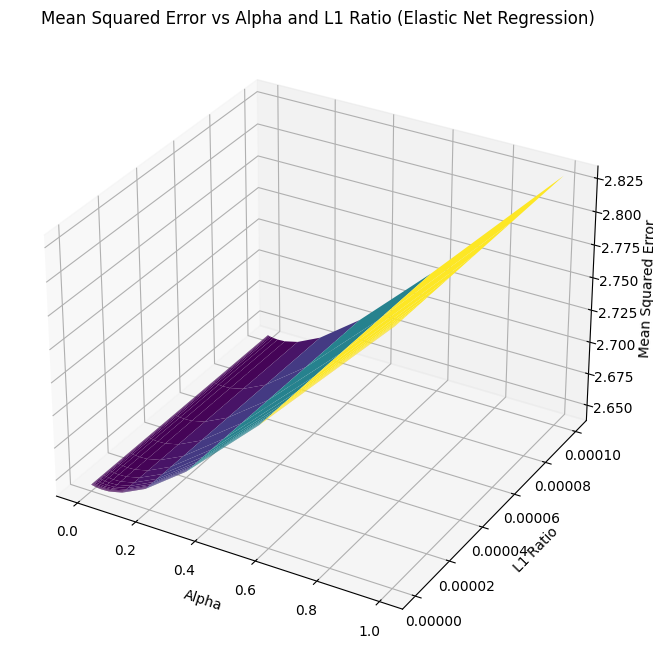

In [ ]:
import numpy as np
from sklearn.linear_model import ElasticNet
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Tạo lưới điểm
alpha_values = np.logspace(-7, 0, 30)
# Thay đổi l1_ratio_values để chỉ bao gồm các giá trị trong khoảng [0, 1]
l1_ratio_values = np.logspace(-9, -4, 30)

alpha_mesh, l1_ratio_mesh = np.meshgrid(alpha_values, l1_ratio_values)

# Tính toán giá trị MSE cho mỗi cặp (alpha, l1_ratio)
mean_mse_values = []
for alpha, l1_ratio in zip(alpha_mesh.ravel(), l1_ratio_mesh.ravel()):
    reg_elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    mse = cross_val_score(reg_elastic_net, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    mean_mse_values.append(-np.mean(mse))

mean_mse_values = np.array(mean_mse_values).reshape(alpha_mesh.shape)

# Vẽ đồ thị 3 chiều
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_mesh, l1_ratio_mesh, mean_mse_values, rstride=1, cstride=1, cmap='viridis')

ax.set_xlabel('Alpha')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('Mean Squared Error')
ax.set_title('Mean Squared Error vs Alpha and L1 Ratio (Elastic Net Regression)')

plt.show()

sau khi chạy mô hình thi ta có alpha 0.0011721022975334817 và l1 là 1e0-8

## 4.4 Triển Khai model và So sánh với baseline

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np


reg_elastic = ElasticNet(alpha=0.03290344562312671, l1_ratio=1e-08)


scores = cross_val_score(reg_elastic, X_scaled, y, scoring='r2', cv=5)
mean_r2 = np.mean(scores)
print(f"R-squared score: {mean_r2:.5f}")

mse = -cross_val_score(reg_elastic, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(f"Mean squared error: {mean_mse:.5f}")

R-squared score: 0.36532
Mean squared error: 2.64166


In [ ]:
# đưa vào các hệ số alpha bằng  sau khi đã chạy mô hình ở trên
from sklearn.metrics import mean_squared_error, r2_score
reg_elastic = ElasticNet(alpha=0.00017575106248547912, l1_ratio=1e-08)

reg_elastic.fit(X_scaled, y)

coef_dict_baseline = {}
for coef, feat in zip(reg_elastic.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'area': 0.6027645640347482,
 'bedroom': 0.3214864942203563,
 'wc': 0.5536296094123331,
 'total_room_LLm': -0.03086221164939923,
 'count_conveniences': -0.20700948875448794,
 'alleyway_property': 0.04162371700002371,
 'numbers_of_floors': 0.3171341647128816,
 'longitude': 0.22312960964840062,
 'latitude': -0.08778209734064839}

Nhìn chung thì vẫn không có hệ số nào bị phạt và các sự thay đổi thì cũng khá tương tự với các hệ số coef của baseline model